# Black Box

Matriculation number: 2663452m

In [1]:
# Importing libraries and setting default values for plotting paramenters

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp 
from scipy import constants as const
import schemdraw as schem
import schemdraw.elements as elm
from schemdraw import dsp

TITLE_SIZE = 20
AXIS_SIZE= 16
ANNOTATE_TITLE = 12
plt.rcParams["font.family"] = "Times New Roman"
%config InlineBackend.figure_format = 'svg'

## Pre-Lab Questions

a) Read labscript and do some revision of the relevant sections from courses, and use textbook to help with understanding.

b)Show that the magnitude of voltage drop over the capacitor can be found by
the following formula:
$$\bigg |{\frac{V_{out}}{V_{in}}}\bigg | = \frac{1}{\sqrt{1+(\omega CR)^2}}$$

Voltage drop over a capcitor in series with a resistor can be derived from: $$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{Z_2}{Z_1 +Z_2}\bigg |$$
Where $Z_1$ is the impedance of the resistor and $Z_2$ is the impedance of the capacitor. The impedance of a capacitor is $\frac{1}{j\omega C}$ and the impedance of a resistor is $R$. Substituting in these values to the formula gives $$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{\frac{1}{j\omega C}}{R + \frac{1}{j\omega C}}\bigg |$$

Then Multiplying by the complex conjugate 
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{\frac{1}{j\omega C}}{R + \frac{1}{j\omega C}}\bigg | \times - \frac{j\omega C}{j\omega C}$$

$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{-\frac{j\omega C}{j\omega C}}{-Rj\omega C + -\frac{j\omega C}{j\omega C}}\bigg | $$

Simplfying the fraction to give:
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{-1}{-1 - Rj\omega C}\bigg |$$

Taking the absolute value of the fraction gives: 
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \frac{1}{\sqrt{1+(\omega CR)^2}}$$

c) Calculating the equaivalent formula for an Inductor.

Again starting with the complex impedamce of an inductor and resistor in series:

$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{Z_2}{Z_1 +Z_2}\bigg |$$

Where $Z_1$ is the impedance of the resistor and $Z_2$ is the impedance of the inductor. The impedance of an inductor is $j\omega L$ and the impedance of a resistor is $R$. Substituting in these values to the formula gives $$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{j\omega L}{R + j\omega L}\bigg |$$

Then Multiplying by the complex conjugate
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{j\omega L}{R + j\omega L}\bigg | \times - \frac{\frac{1}{j\omega L}}{\frac{1}{j\omega L}}$$

Givin:
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{-\frac{j\omega L}{j\omega L}}{-\frac{R}{j\omega L} + -\frac{j\omega L}{j\omega L}}\bigg | $$

Simplfying the fraction gives:
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{-1}{-1 - \frac{R}{j\omega L}}\bigg |$$

And taking the absolute value of the fraction gives: 
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \frac{1}{\sqrt{1+\left(\frac{R}{\omega L}\right)^2}}$$


d) When using the potential divider equation for two resistors in series, $$\frac{V_{out}}{V_{in}} = \frac{R_2}{R_1 + R_2}$$ it is independent of the frequency of the input signal $\omega$, however, in the two formulas derived above the magnitude of the voltage drop for a capacitor and inductor in series with a resistor are dependent on the frequency of the input signal $\omega$.

## Aims

The first aim of this lab is to investigate the values of a resistor, capacitor and inductor in a circuit using a signal generator and an oscilloscope.
The second aim is to build an RLC circuit and calculate the resonant frequency of the circuit.

## Measuring the value of the Resistor in the Black box
To carry out this section it is necessary to build a voltage divider circuit using two resistors in series with R1 being of known value (10 $\Omega$) and R2 being the unknown resistor. The circuit is shown below:

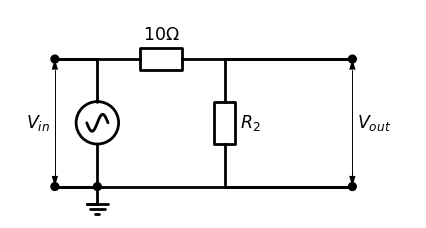

In [2]:
#Drawing a circuit diagram for a potential divider with 2 resistors using the schemdraw library

elm.style(elm.STYLE_IEC)
with schem.Drawing(backend = 'Matplotlib') as d:
    d += elm.SourceSin().up()
    d += elm.Line().left().length(1)
    d += elm.Dot()
    d += elm.Arrow(double = True).linewidth(0.7).down().hold().label(r'$V_{in}$', loc='top')
    d += elm.Line().right().length(1)
    d += elm.Resistor().right().label(r'$10\Omega$')
    d += elm.Line().right()
    d += elm.Arrow(double = True).linewidth(0.7).down().hold().label(r'$V_{out}$', loc='bottom')
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Resistor().down().label(r'$R_2$', loc='bottom')
    d += elm.Line().right()
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Line().left()
    d += elm.Line().left().length(1)
    d += elm.Dot()
    d += elm.Line().right().length(1)
    d += elm.Dot()
    d += elm.Ground()



    

Using this circuit the voltage in and voltage out can be measured, and the value of R2 can be calculated using the formula: $$\frac{V_{out}}{V_{in}} = \frac{R_2}{R_1 + R_2}$$ and rearranging to give: $$R_2 = \left(\frac{\frac{V_{out}}{V_{in}}R_1}{\frac{V_{out}}{V_{in}} - 1}\right)$$

In [3]:
# define a function to calculate the resistance of R_2 the unknown resistor

def r_2(r_1, v_in, v_out):
    return ((v_out/v_in)*r1)/(1-(v_out/v_in))
r1 = 10 #Ohms
Vin = 7.4 #Volts
Vout = 6.6 #Volts

print('The resistance of the unknown resistor R_2 is = ', r_2(r1, Vin, Vout), 'Ohms')

The resistance of the unknown resistor R_2 is =  82.4999999999999 Ohms


## Measuring the value of the Capacitor in the Black box
To carry out this section it is necessary to build a voltage divider circuit using the resistor in the black box that has just been determined and the capacitor in series with Z1 being of known value (82.5 $\Omega$) and Z2 being the unknown Capacitor. The circuit is shown below:

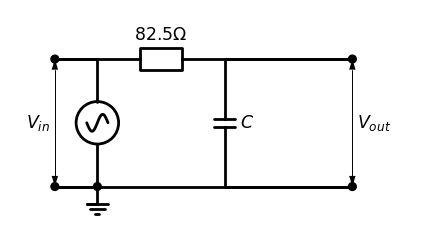

In [4]:
#Drawing a circuit diagram for a potential divider with a resistor and a capacitor using the schemdraw library

elm.style(elm.STYLE_IEC)
with schem.Drawing() as d:
    d += elm.SourceSin().up()
    d += elm.Line().left().length(1)
    d += elm.Dot()
    d += elm.Arrow(double = True).linewidth(0.7).down().hold().label(r'$V_{in}$', loc='top')
    d += elm.Line().right().length(1)
    d += elm.Resistor().right().label(r'$82.5\Omega$')
    d += elm.Line().right()
    d += elm.Arrow(double = True).linewidth(0.7).down().hold().label(r'$V_{out}$', loc='bottom')
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Capacitor().down().label(r'$C$', loc='bottom')
    d += elm.Line().right()
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Line().left()
    d += elm.Line().left().length(1)
    d += elm.Dot()
    d += elm.Line().right().length(1)
    d += elm.Dot()
    d += elm.Ground()


Using this circuit the voltage in and voltage out can be measured, and the value of Z_2 can be calculated using the complex impedance formula: $$\frac{V_{out}}{V_{in}} = \frac{Z_2}{Z_1 + Z_2}$$ and as derived in the prelab questions for a capacitor: $$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \frac{1}{\sqrt{1+(\omega CR)^2}}$$
Rearranging for capacitance to give: $$C = \frac{\sqrt{ \bigg | \frac{V_{in}}{V_{out}}\bigg |^2-1}}{\omega R}$$

In [5]:
#Define a funtion to calculate the capacitance of the unknown capacitor

def cap(r_1, v_in, v_out,freq):
    return ((np.sqrt(((v_in/v_out)**2)-1)) / (2*np.pi*freq*r_1))

r1 = 82.5 #Ohms
vin = 6.6 #Volts
vout = 1.56 #Volts
nu = 1.99*10**6 #Hz
capa = cap(r1, vin, vout, nu)
print(f'The capacitance of the unknown capacitor is =  {cap(r1, vin, vout, nu):4.4g} Farads')

The capacitance of the unknown capacitor is =  3.985e-09 Farads


## Measuring the value of the Inductor in the Black box
To carry out this section it is necessary to build a voltage divider circuit using the resistor in the black box that has been determined and the inductor in series with Z1 being of known value (82.5 $\Omega$) and Z2 being the unknown inductor. The circuit is shown below:

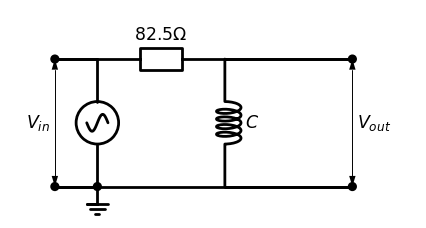

In [6]:
#Drawing a circuit diagram for a potential divider with a resistor and an inductor in series using the schemdraw library

elm.style(elm.STYLE_IEC)
with schem.Drawing() as d:
    d += elm.SourceSin().up()
    d += elm.Line().left().length(1)
    d += elm.Dot()
    d += elm.Arrow(double = True).linewidth(0.7).down().hold().label(r'$V_{in}$', loc='top')
    d += elm.Line().right().length(1)
    d += elm.Resistor().right().label(r'$82.5\Omega$')
    d += elm.Line().right()
    d += elm.Arrow(double = True).linewidth(0.7).down().hold().label(r'$V_{out}$', loc='bottom')
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Inductor2().down().label(r'$C$', loc='bottom')
    d += elm.Line().right()
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Line().left()
    d += elm.Line().left().length(1)
    d += elm.Dot()
    d += elm.Line().right().length(1)
    d += elm.Dot()
    d += elm.Ground()


Using this circuit the voltage in and voltage out can be measured, and the value of Z_2 can be calculated using the complex impedance formula: $$\frac{V_{out}}{V_{in}} = \frac{Z_2}{Z_1 + Z_2}$$ and as derived in the prelab questions for an inductor: $$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \frac{1}{\sqrt{1+\left(\frac{R}{\omega L}\right)^2}}$$
Rearranging for inductance to give: $$L = \frac{R}{\omega \sqrt{ \bigg | \frac{V_{in}}{V_{out}}\bigg |^2-1}}$$

In [7]:
#Define a funtion to calculate the inductance of the unknown inductor

def inductance(r_1, v_in, v_out,freq):
    return (r_1)/(2*np.pi*freq*(np.sqrt(((v_in/v_out)**2)-1)))

r1 = 82.5 #Ohms
vin = 10.2 #Volts
vout = 2.62 #Volts
nu = 1.843 #Hz

print(f'The inductance of the unknown inductor is =  {inductance(r1, vin, vout, nu):4.4g} Henry`s')

The inductance of the unknown inductor is =  1.894 Henry`s


## Determining the internal resistance of the inductor

To determine the internal resistance of the inductor, we can once again consider a circuit that contains a resistor and an inductor in series. Then by considering the formula for complex impedance where the resistor is $Z_1$ and the inductor with measurable internal resistance is $Z_2$ ($Z_L+Z_{R_L}$). Giving the formula: $$\frac{V_{out}}{V_{in}} = \frac{Z_L + Z_{R_L}}{Z_1 + (Z_L + Z_{R_L})}$$#

And by substituting in the values for the impedance of the resistor and inductor with measurable internal resistance $Z_R = R $, $Z_L = j\omega L$ and $Z_{R_L} = R_L$, we get the formula: $$\frac{V_{out}}{V_{in}} = \frac{j\omega L + R_L}{R + (j\omega L + R_L)}$$
But as the inductance is inversely proportional to the frequency, if we take the limit as $\omega \rightarrow 0$ we get the formula: $$\frac{V_{out}}{V_{in}} = \frac{R_L}{R + R_L}$$ where we can consider the the inductor to be a resistor with a value of $R_L$.

In [8]:
# use the resistor function to calculate the internal resistance of the inductor

r1 = 82.5 #Ohms
Vin = 7.6 #Volts
Vout = 1.93 #Volts

print(f'The resistance of the internal resistance of the inductor R_L is =  {r_2(r1, Vin, Vout):4.4g} Ohms')

The resistance of the internal resistance of the inductor R_L is =  28.08 Ohms


### Calculating a better value for the inductance of the inductor by considering the internal resistance of the inductor

To calculate a better value for the inductance of the inductor, start by considering the complex impedance formula and substituting in the values for the impedance of the resistor and inductor with measurable internal resistance $Z_R = R $, $Z_L = j\omega L$ and $Z_{R_L} = R_L$, we get the formula: $$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{j\omega L + R_L}{R + (j\omega L + R_L)}\bigg|$$ As done above in pre-lab question d) we can multiply by the complex conjugate of Z_L to get the formula: $$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{-\frac{j\omega L}{j\omega L} - \frac{R_L}{j\omega L}}{-\frac{R}{j\omega L} - \frac{j\omega L + R_L}{j\omega L}}\bigg |$$ 
And simplify and rearrange for L to get the formula: $$L = \frac{\sqrt{\frac{\bigg |\frac{V_{out}}{V_in}\bigg | (R+R_L)^2-R_L^2}{1-\bigg |\frac{V_{out}}{V_{in}}\bigg|^2}}}{\omega}$$

In the cell below the values are substituted in and the inductance is calculated.

In [9]:
# Calculate corrected inductance when considering the internal resistance of the inductor by defining a new function

def inductance_corrected(r, v_in, v_out,freq,r_l):
    return (np.sqrt(((v_out/v_in)*((r+r_l)**2)-r_l**2)/(1-((v_out/v_in)**2))))/(2*np.pi*freq)

r= 82.5 #Ohms
r_l = 28.08 #Ohms
vin = 13.8 #Volts
vout = 13.4 #Volts
freq = 1.585e4
ind = inductance_corrected(r, vin, vout, freq, r_l)
print(f'The corrected inductance of the unknown inductor is =  {inductance_corrected(r, vin, vout, freq, r_l):4.4g} Henry`s')

The corrected inductance of the unknown inductor is =  0.004423 Henry`s


## Building an RLC circuit and calculating the resonant frequency

In this section of the lab a RLC circuit was built and using the known values of the resistor, capacitor and inductor the resonant frequency equation for the circuit can be derived and then from this obtain the theorectical resonant frequency of the circuit. With this known value we can investigate different frequencys around the resonant frequency and see how the voltage across the capacitor changes.
To build the RLC circuit, the following circuit diagram was used:

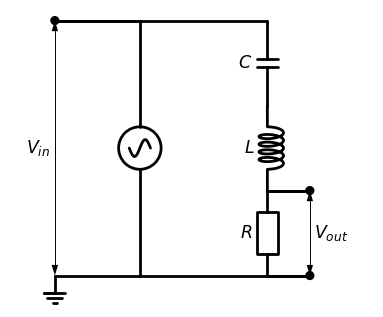

In [10]:
#Drawing a circuit diagram for the RLC circuit using the schemdraw library

elm.style(elm.STYLE_IEC)
with schem.Drawing() as d:
    d += elm.SourceSin().up().length(6)
    d += elm.Line().left().length(2)
    d += elm.Dot()
    d += elm.Arrow(double = True).linewidth(0.7).down().hold().label(r'$V_{in}$', loc='top').length(6)
    d += elm.Line().right().length(2)
    d += elm.Line().right() 
    d += elm.Capacitor().down().label(r'$C$', loc='top').length(2)
    d += elm.Inductor2().down().label(r'$L$', loc='top').length(2)
    d += elm.Line().right().length(1)
    d += elm.Dot()
    d += elm.Line().left().length(1)
    d += elm.Resistor().down().label(r'$R$', loc='top').length(2)
    d += elm.Line().right().length(1)
    d += elm.Dot()
    d += elm.Arrow(double = True).linewidth(0.7).up().hold().label(r'$V_{out}$', loc='bottom').length(2)
    d += elm.Line().left().length(1)
    d += elm.Line().left()
    d += elm.Line().left().length(2)
    d += elm.Ground()
    


### Deriving the resonant frequency equation

Starting with the equation for complex impedance in a circuit, $$\frac{V_{out}}{V_{in}} = \frac{Z_2}{Z_1 + Z_2}$$

Where $Z_2$ is the impedance of the resistor and $Z_1$ is the impedance of the inductor and capacitor in series. Then by substituting in the values for the impedance of the resistor and inductor and capacitor $Z_R = R $, $Z_L = j\omega L$ and $Z_C = \frac{1}{j\omega C}$, we get the formula: $$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg | \frac{R}{(j\omega L + \frac{1}{j\omega C})+R}\bigg |$$

By taking out the common factor of $j$ on the denominator and taking the absolute values of the fractio, the following formula can be obtained $$ \left(\frac{V_{out}}{V_{in}}\right)^2 = \frac{R^2}{\left(\frac{1}{\omega C}-\omega L\right)^2+R^2}$$

As this is a ratio of the resistances, the largest value the right hand side of this equation can take is 1, and therefore it is at this point when $$\left(\frac{1}{\omega C}-\omega L\right)^2 = 0$$
Or equivalently when $$\omega = \sqrt{\frac{1}{LC}}$$

Calculating this in the cell below gives:

In [11]:
#Define a function for the corrected inductance

def res_omega(c,l):
    return (np.sqrt(1/(c*l)))/(2*np.pi)

capac = capa
induct = ind

print(f'The resonance frequency of the RLC circuit is =  {res_omega(capac, induct):4.4g} Hz')

The resonance frequency of the RLC circuit is =  3.791e+04 Hz


### Taking measurements around the resonant frequency and experimentally determining the resonant frequency

In this section a plot of the voltage drop across the resistor as a function of frequency was taken around the resonant frequency of the circuit. The plot is shown below:

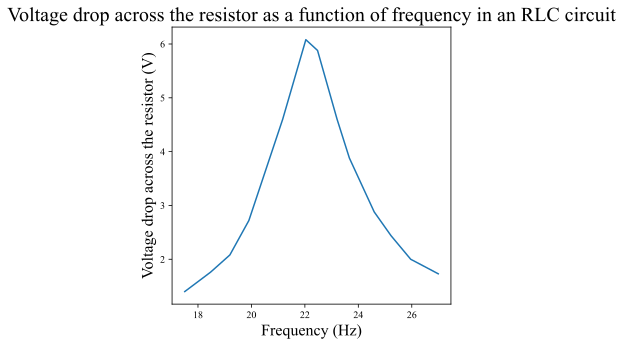

In [16]:
#Plotting the voltage drop across the resistor as a function of frequency in an RLC circuit

data = np.loadtxt('RLC.txt', delimiter = ',')

resistance = data[:,0]
capacitance = data[:,1]


plt.figure(figsize = (5,5))
plt.plot(resistance, capacitance)
plt.title('Voltage drop across the resistor as a function of frequency in an RLC circuit', fontsize = TITLE_SIZE)
plt.xlabel('Frequency (Hz)', fontsize = AXIS_SIZE)
plt.ylabel('Voltage drop across the resistor (V)', fontsize = AXIS_SIZE)
plt.show()


